In [55]:
! pip install pandas matplotlib bokeh folium

    100% |████████████████████████████████| 81kB 1.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for folium ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/04/d0/a0/b2b8356443364ae79743fce0b9b6a5b045f7560742129fde22
Successfully built folium


In [56]:
import pandas as pd


In [57]:
df = pd.read_csv('/home/jovyan/work/mnt/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [58]:
df.drop(["id"], axis=1, inplace=True)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 3.3+ MB


In [60]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [61]:
df.quantile(.8)

price            700108.0000
bedrooms              4.0000
bathrooms             2.5000
sqft_living        2730.0000
sqft_lot          12186.6000
floors                2.0000
waterfront            0.0000
view                  0.0000
condition             4.0000
grade                 8.0000
sqft_above         2410.0000
sqft_basement       700.0000
yr_built           2001.0000
yr_renovated          0.0000
zipcode           98125.0000
lat                  47.6908
long               -122.0940
sqft_living15      2510.0000
sqft_lot15        11094.2000
Name: 0.8, dtype: float64

In [62]:
df.drop(df[df.bedrooms > 4].index, inplace=True)
df.drop(df[df.bedrooms == 0].index, inplace=True)
# ignore outliers, more expensive then 1.5M
df.drop(df[df.price > 1500000].index, inplace=True)

# change price scale from USD to thoushand USD
df["price"] = df["price"]/1000

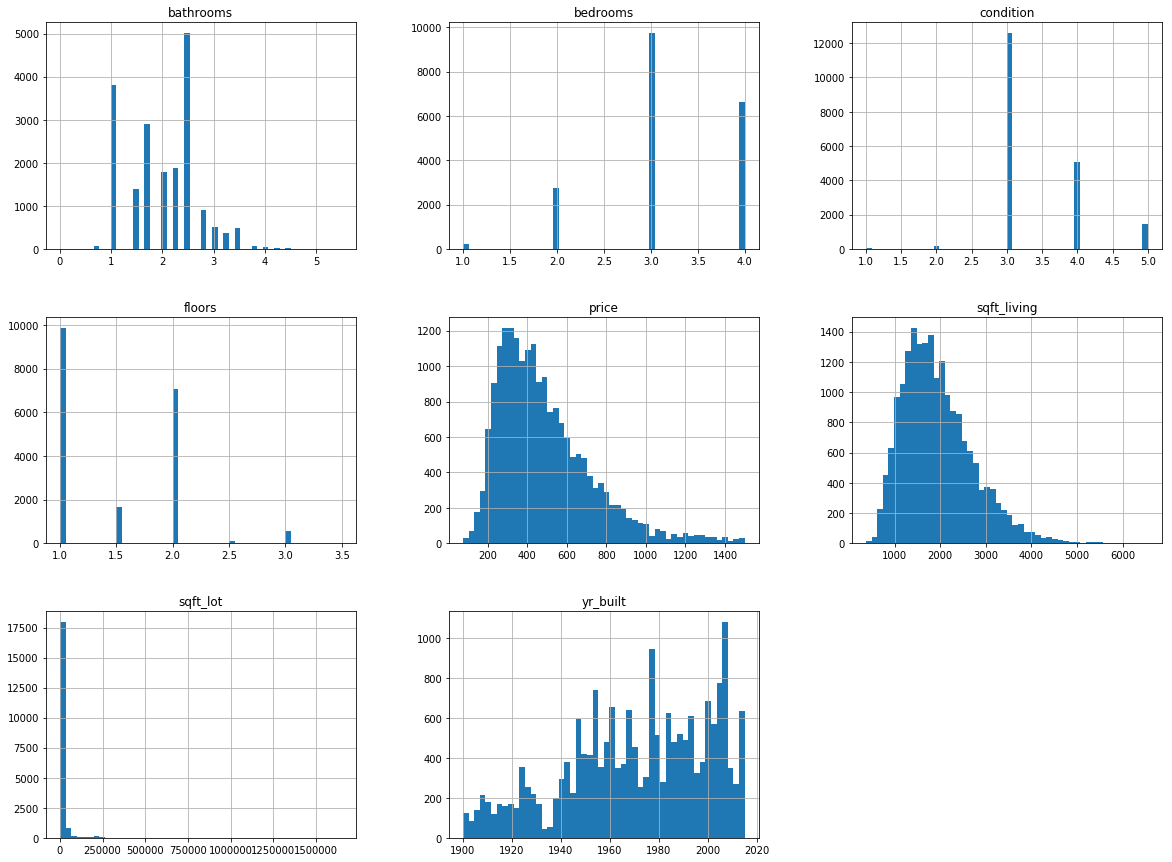

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(column=["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "condition", "yr_built"],
         bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [64]:
df['price_per_sqft'] = df['price']/df['sqft_living']

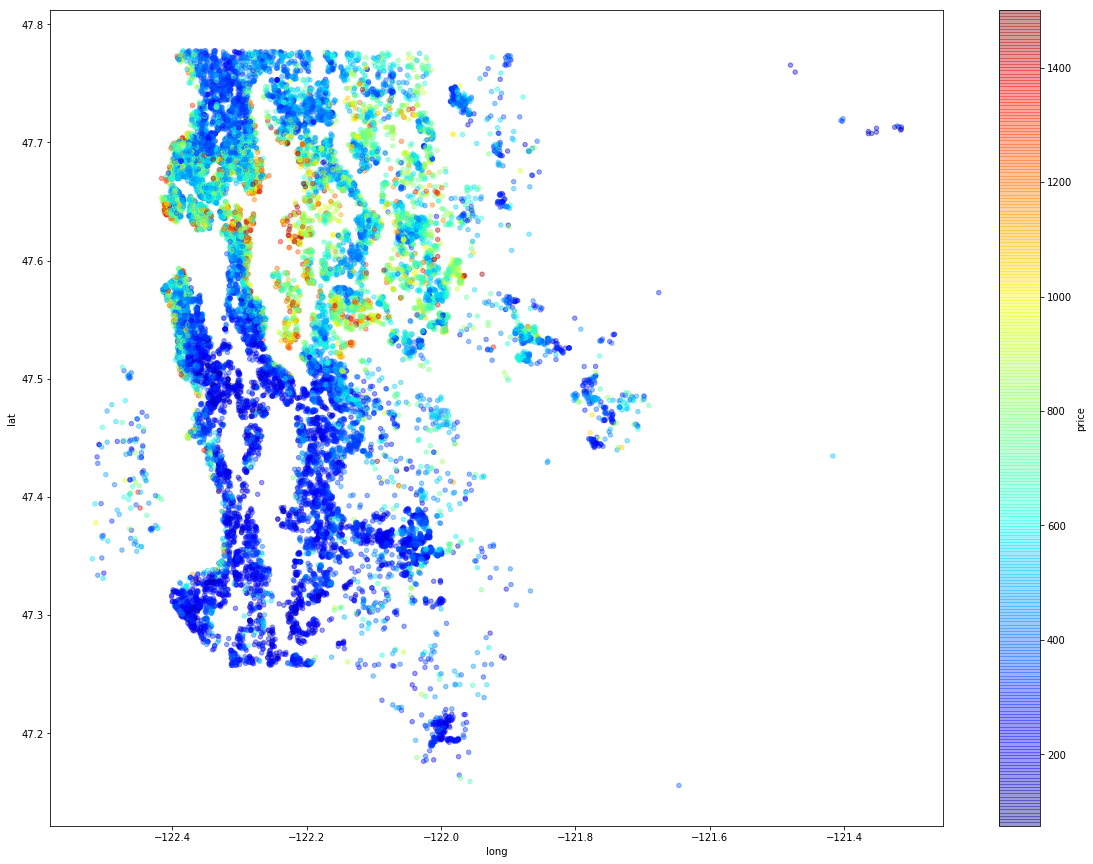

In [65]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(20,15),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

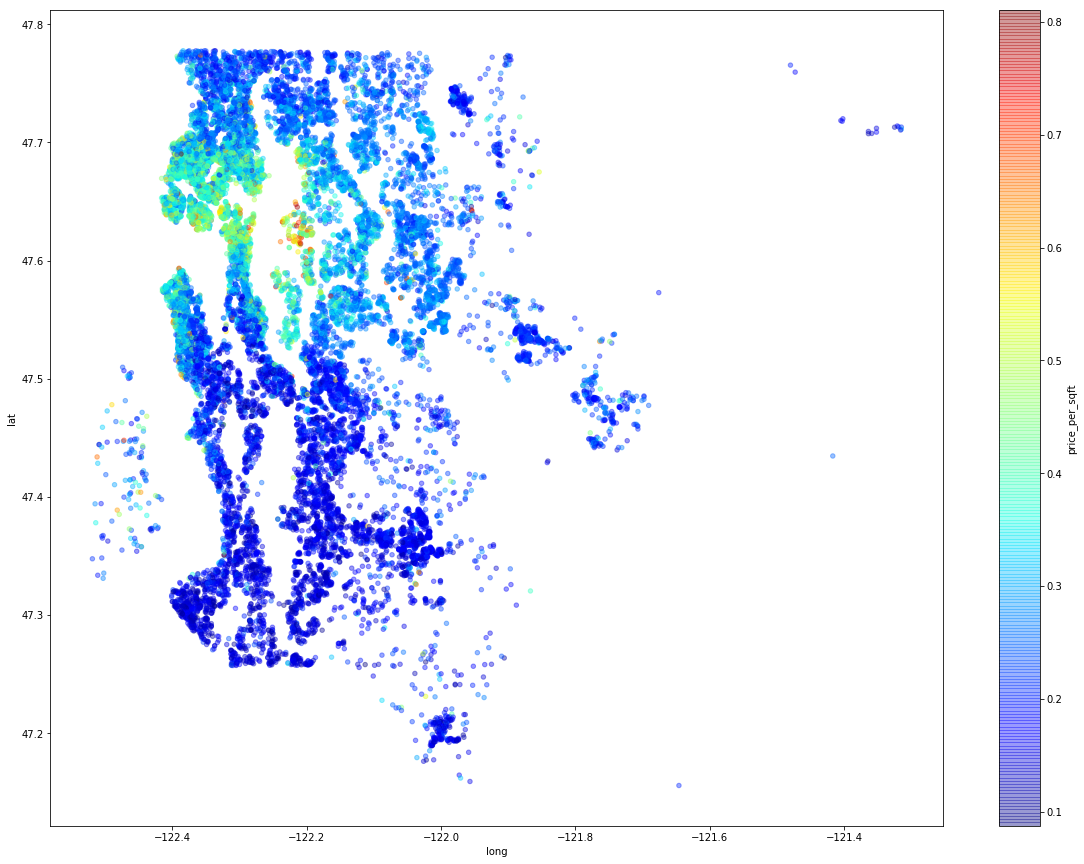

In [66]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.4, figsize=(20,15),
    c="price_per_sqft", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [73]:
import folium
from folium.plugins import HeatMap

# We could for example compute the mean house price by zip code, then plot this out on a map. In the below code, we'll:
# - group the dataframe by zipcode,
# - Compute the average price of each column
# - add a column with the total number of observations (i.e., house sales) per zipcode

houses_heatmap = folium.Map(location = [df['lat'].mean(), df['long'].mean()], zoom_start = 9, tiles="OpenStreetMap")
houses_heatmap.add_child(HeatMap([[row["lat"], row["long"]] for name, row in df.iterrows()]))
#houses_heatmap.create_map("heatmap.html")
display(houses_heatmap)

In [54]:
# let’s look at how much each independent variable correlates with this dependent variable (which is price)
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price             1.000000
grade             0.658054
sqft_living       0.650540
sqft_above        0.550247
price_per_sqft    0.511570
bathrooms         0.471284
lat               0.400209
view              0.301118
bedrooms          0.291501
floors            0.271417
sqft_basement     0.258121
yr_renovated      0.103940
waterfront        0.093434
sqft_lot          0.092065
yr_built          0.056045
long              0.043791
condition         0.035904
zipcode          -0.011823
Name: price, dtype: float64

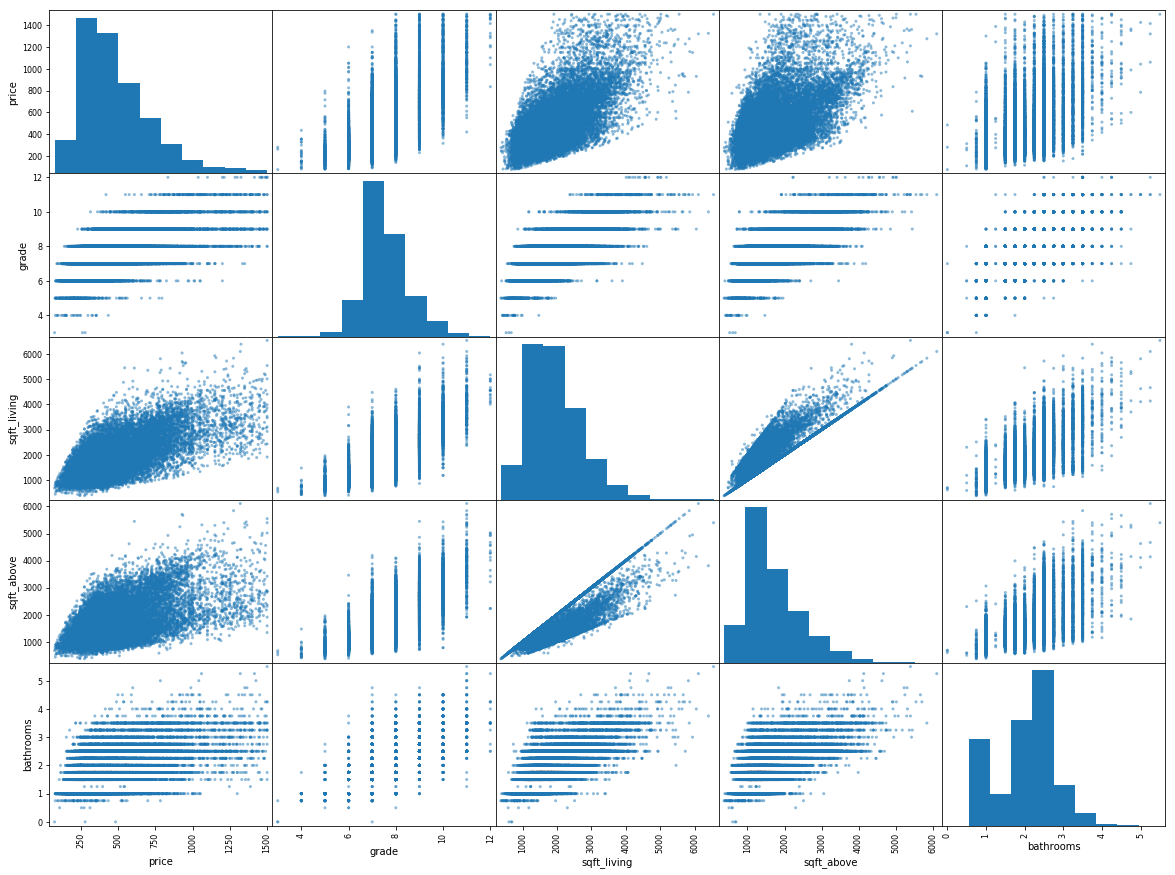

In [51]:
from pandas.plotting import scatter_matrix
attributes = ["price", "grade", "sqft_living", "sqft_above", "bathrooms"]
scatter_matrix(df[attributes], figsize=(20, 15))
plt.savefig('matrix.png')